# <center> Relazione 2 </center>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.optimize import curve_fit

L'obiettivo di questa esercitazione è imparare a utilizzare tecniche di integrazione Monte-Carlo e studiare i Random Walk come processo di tipo stocastico.

## <center> <span style="color: blue;">Esercizio 1</span> </center>

Lo scopo dell'esercitazione è calcolare mediante metodi Monte-Carlo l'integrale:
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

In particolare l'integrale sarà calcolato con 4 metologie differenti:
- densità di probabilità uniforme

- densità di probabilità $p(x) = \frac{6}{5}\left(1-\frac{x^2}{2}\right)$ campionata con metodo Accept/Reject

- densità di probabilità $p(x) = \frac{6}{5}\left(1-\frac{x^2}{2}\right)$ campionata con metodo ibrido

- densità di probabilità $p(x) = 2\left(1\,-\,x\right)$ campionata con metodo della cumulativa

### Campionamento uniforme

Consideriamo l'integrale:
$$I\,=\,\int_a^b f(x)dx$$ 
Supponiamo di avere una partizione di $[a,\,b]$ in $N$ sotto-intervalli di pari dimensione. L'integrale può essere stimato come segue:
$$I\,\simeq\,\sum_{i\,=\,1}^N \Delta x_i f(x_i)\,=\,\frac{b\,-\,a}{N} \sum_{i\,=\,1}^N f(x_i)\,=\,(b\,-\,a)\langle f \rangle _{[a,\,b]}$$
Ciò che faremo sarà quindi campionare uniformemente l'intervallo $[a,\,b]$ in modo tale da costruire il valor medio della f sull'intervallo preso in considerazione: aumentando il numero $N$ di stime si tende al valore dell'integrale. In particolare considero $N\,=\,100$ blocchi con lunghezza del singolo blocco $L\,=\,100000$.

Stima finale: 1.00008 +/- 0.00015


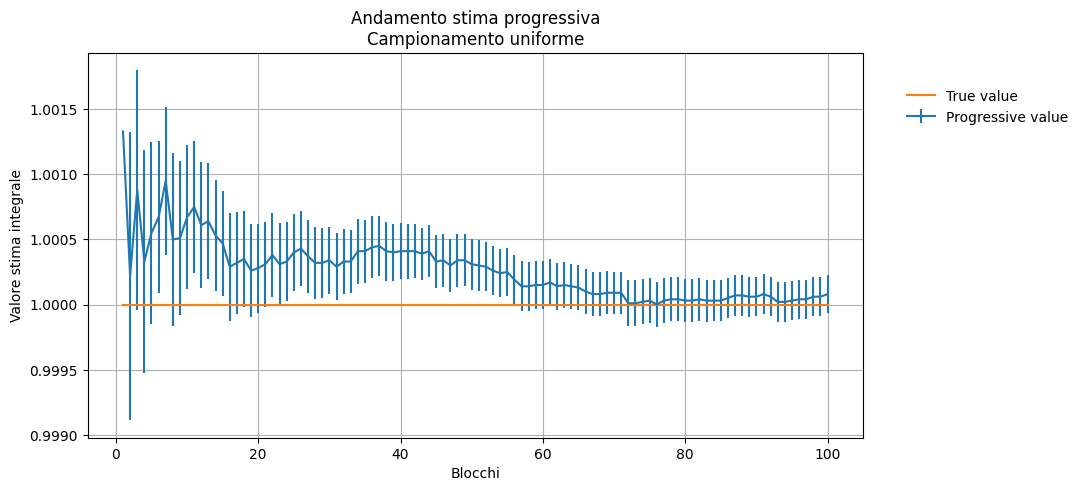

In [2]:
n_throws = 100000             # Numero di lanci per blocco
N=100                         # Numero di blocchi

# Importo i valori generati con codice in C++
med_prog, devmed_prog = np.loadtxt("ESERCIZIO_1/StimaUniforme.dat", unpack=True)


figura, plot = plt.subplots(1, 1, figsize=(10, 5))

#Asse x del grafico
x = np.arange(1, N+1, 1)

plt.errorbar(x,med_prog,yerr=devmed_prog, label = "Progressive value")
plt.plot(x, np.array([1 for i in range(0,len(x))]), label = "True value")
plt.xlabel('Blocchi')
plt.ylabel('Valore stima integrale')

plt.legend(loc=(1.05, 0.8), frameon=False)
plt.title(f'Andamento stima progressiva\nCampionamento uniforme')

print('Stima finale: ' + str(np.round(med_prog[N-1], 5)) + ' +/- ' + str(round(devmed_prog[N-1], 5)))

plt.grid(True)
plt.show()

Si nota che il valore calcolato con la tecnica del campionamento uniforme è altamente compatibile con il valore universalmente noto.

### Importance sampling

L'idea alla base del metodo dell'Importance Sampling è che alcuni valori della variabile aleatoria di input hanno maggiore impatto sul parametro che viene stimato rispetto ad altri. Se questi valori "importanti" vengono campionati più frequentemente si ha come effetto che la varianza dello stimatore può essere ridotta, ottenendo un risultato più preciso. Consideriamo quindi l'integrale:

$$I\,=\,\int g(\vec{x})p(\vec{x})d\vec{x}$$

La funzione $p(\vec{x})$ non è per forza la migliore distribuzione di probabilità da usare per il nostro calcolo Monte-Carlo. Si può introdurre nell'integrale una nuova distribuzione di probabilità:

$$I\,=\,\int \left[\frac{g(\vec{x})p(\vec{x})}{d(\vec{x})}\right]d(\vec{x})d\vec{x}$$

Chiaramente il rapporto fra le parentesi quadre può essere divergente al più su un insieme di misura nulla. Si può dimostrare che delle distribuzioni di probabilità che hanno un andamento simile alla quantità fra $g\left(x\right)p\left(x\right)$ garantiscono una riduzione della varianza poichè una volta introdotta la $d\left(x\right)$ ciò che valuto è una funzione circa costante ad uno.

### Campionamento Accept/Reject

Il metodo Accept/Reject necessità della conoscenza dell'espressione analitica della $p(x)$. Si considera una regione rettangolare di piano (campionamento distribuzione 1D) che abbia come base l'intervallo considerato e come altezza l'intervallo $[0,\,p_{max}]$: in tale porzione si generano randomicamente dei punti. Se essi ricadono al di sotto del grafico della $p(x)$ vengono salvati, altrimenti scartati.

In [3]:
#Importo valori per test distribuzioni di probabilità
test = np.loadtxt("ESERCIZIO_1/Test.dat", unpack=True)

Per prima cosa testo il metodo che ho scritto per il campionamento di:
$$\,\,p(x) = \frac{6}{5}\left(1-\frac{x^2}{2}\right)$$
Si nota un buonissimo accordo fra curva teorica e l'istogramma generato dal metodo implementato in codice C++.

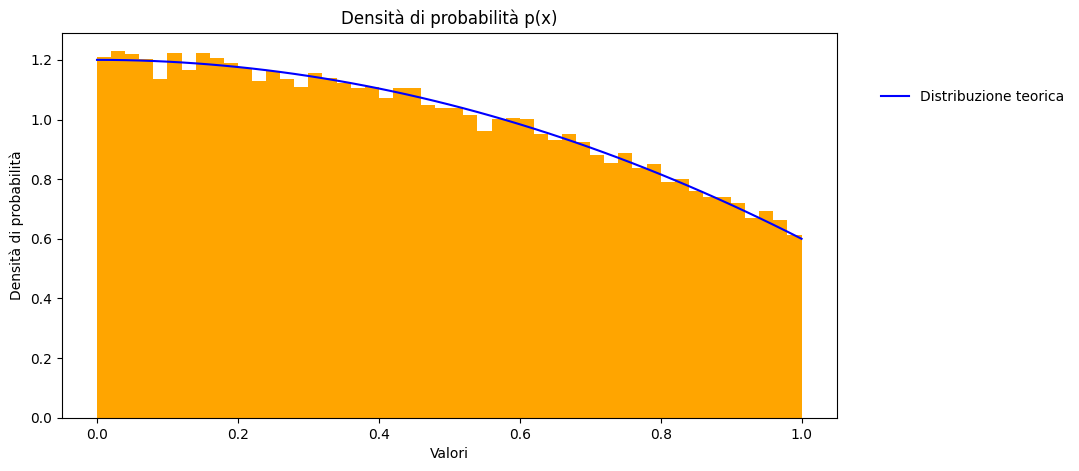

In [4]:
figura, grafico = plt.subplots(1, 1, figsize=(10, 5))

#Valori generati con il metodo accept/reject
grafico.hist(test[ : , 0], bins=50, density=True, facecolor='orange')

#Distribuzione di probabilità teorica
x = np.array([ i * 1/50 for i in range(0, 51)])
f = np.array([ 6 * (1 - i * i/2)/5 for i in x ])

grafico.plot(x, f, color = 'blue', label = "Distribuzione teorica")

# Aggiungiamo etichette ai nostri assi
plt.xlabel('Valori')
plt.ylabel('Densità di probabilità')

#Legenda e titolo del grafico
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.title(f"Densità di probabilità p(x)")


# Mostriamo il grafico
plt.show()

Procedo ora con il calcolo dell'integrale: ho anche in questo caso un buon accordo fra valore calcolato con metodi Monte-Carlo ed invece valore noto.

Stima finale: 0.9999 +/- 0.00011


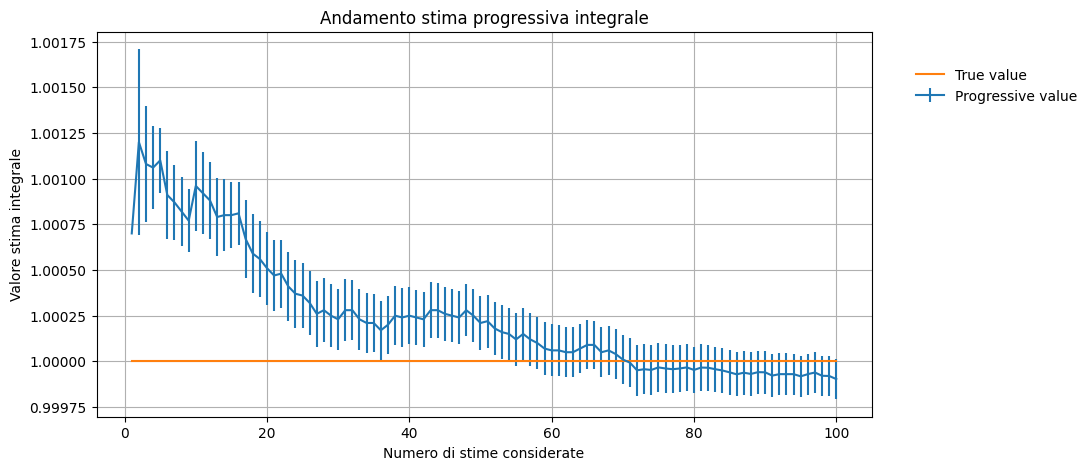

In [5]:
# Importo i valori generati con codice in C++
med_prog, devmed_prog = np.loadtxt("ESERCIZIO_1/StimaDistr1AR.dat", unpack=True)


figura, plot = plt.subplots(1, 1, figsize=(10, 5))

#Asse x del grafico
x = np.arange(1, N+1, 1)

plt.errorbar(x,med_prog,yerr=devmed_prog, label = "Progressive value")
plt.plot(x, np.array([1 for i in range(0,len(x))]), label = "True value")
plt.xlabel('Numero di stime considerate')
plt.ylabel('Valore stima integrale')

plt.legend(loc=(1.05, 0.8), frameon=False)
plt.title(f"Andamento stima progressiva integrale")

print('Stima finale: ' + str(np.round(med_prog[N-1], 5)) + ' +/- ' + str(round(devmed_prog[N-1], 5)))

plt.grid(True)
plt.show()

### Campionamento ibrido

Il metodo Accept/Reject sopra descritto è abbastanza inefficiente, dato che un elevato quantitativo di punti generati devono essere scartati. Si può provare ad aumentare l'efficienza del metodo di campionamento utilizzando un metodo ibrido: tale metodo funziona come segue. Come prima cosa è necessario trovare una funzione $g(x)$ che approssimi bene $p(x)$, ma che sia dotata di due proprietà particolari:

- $g(x)$ è integrabile

- $p(x)\,\lt\,g(x)$ per ogni possibile x appartenente all'intervallo preso in considerazione.

Applichiamo il metodo di inversione della cumulativa per generare un numero casuale distribuito secondo $g(x)$. Tale valore viene accettato con probabilità di accettazione pari a:

$$p_{acc}(x)\,=\,\frac{p(x)}{g(x)}$$

La distribuzione che verrà campionata sarà nuovamente:
$$p(x) = \frac{6}{5}\left(1-\frac{x^2}{2}\right)$$
utilizzando come g(x):
$$g(x)\,=\,\frac{4}{3}\left(1\,-\,\frac{x}{2}\right)$$
Notiamo che la $g(x)$ rispetta la condizione: $\forall x\,\,g(x)\,\geq\,0$. Vogliamo però anche che $g(x)\,\geq\,p(x)$. Dato che per il processo di puro campionamento non è necessaria la normalizzazione della $p(x)$, scegliamo :
$$p(x) = 1-\frac{x^2}{2}$$
che è una re-normalizzazione della distribuzione di probabilità target. Per poter implementare il metodo ibrido dobbiamo generare dei valori secondo la g(x): possiamo farlo utilizzando il metodo della funzione cumulativa.
$$y\,=\,F(x)\,=\,\int^{x}_{0}\frac{4}{3}\left(1\,-\,\frac{x_1}{2}\right)dx_1\,=\,\frac{4}{3}\left(x\,-\,\frac{x^2}{4}\right)$$
Si ottiene allora che:
$$x^2\,-\,4x\,+\,3y\,=\,0$$
Possiamo ottenere dei valori distribuiti come $g(x)$ quindi come:
$$x\,=\,2\,-\,\sqrt{4\,-\,3y}$$
dove y viene estratto uniformemente. Posso ora campionare la $p(x)$ partendo da dei valori distribuiti secondo g(x) con probabilità di accettazione:
$$ p_{accept}\,=\,\frac{p(x)}{g(x)} $$

Testo in primo luogo che il metodo utilizzato sia corretto. Anche in questo caso trovo quanto ricercato, ossia una buona compatibilità fra $p(x)$ da campionare e risultato numerico:

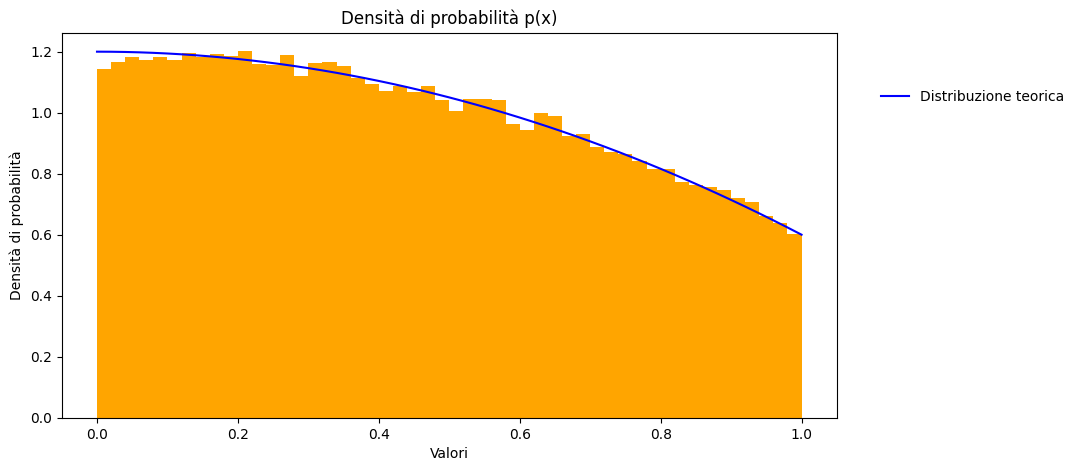

In [6]:
figura, grafico = plt.subplots(1, 1, figsize=(10, 5))

#Valori generati con il metodo accept/reject
grafico.hist(test[ : , 1], bins=50, density=True, facecolor='orange')

#Distribuzione di probabilità teorica
x = np.array([ i * 1/50 for i in range(0, 51)])
f = np.array([ 6 * (1 - i * i/2)/5 for i in x ])

grafico.plot(x, f, color = 'blue', label = "Distribuzione teorica")

# Aggiungiamo etichette ai nostri assi
plt.xlabel('Valori')
plt.ylabel('Densità di probabilità')

#Legenda e titolo del grafico
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.title(f"Densità di probabilità p(x)")


# Mostriamo il grafico
plt.show()

Una volta appurato che la distribuzione generata è quella ricercata posso procedere con la stima dell' integrale: lavoro con $N\,=\,100$ blocchi di lunghezza $L\,=\,100000$ ciascuno.

Stima finale: 1.00008 +/- 9.964e-05


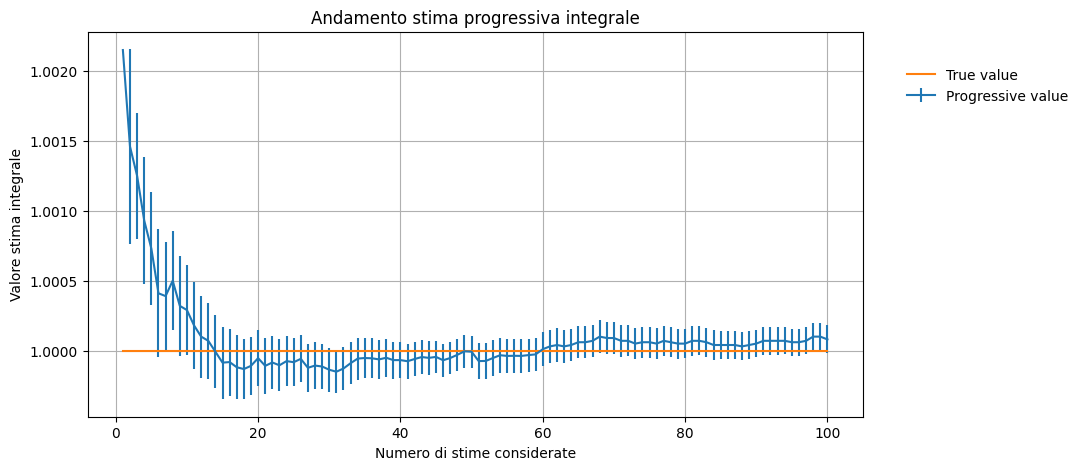

In [7]:
# Importo i valori generati con codice in C++
med_prog, devmed_prog = np.loadtxt("ESERCIZIO_1/StimaDistr1Hyb.dat", unpack=True)


figura, plot = plt.subplots(1, 1, figsize=(10, 5))

#Asse x del grafico
x = np.arange(1, N+1, 1)

plt.errorbar(x,med_prog,yerr=devmed_prog, label = "Progressive value")
plt.plot(x, np.array([1 for i in range(0,len(x))]), label = "True value")
plt.xlabel('Numero di stime considerate')
plt.ylabel('Valore stima integrale')

plt.legend(loc=(1.05, 0.8), frameon=False)
plt.title(f"Andamento stima progressiva integrale")

print('Stima finale: ' + str(np.round(med_prog[N-1], 8)) + ' +/- ' + str(round(devmed_prog[N-1], 8)))

plt.grid(True)
plt.show()

Si può notare anche in questo caso una elevata compatibilità fra valori simulati e valor vero: lo stimatore si trova distante meno di un sigma da $1$.

### Campionamento per inversione della cumulativa

In questo caso lavoro con il metodo di inversione della cumulativa. La $p(x)$ ricercata è diversa dai due esempi precedenti, infatti l'ultima stima viene effettuata utilizzando come densità di probabilità:
$$p(x)\,=\,2\left(1\,-\,x\right)$$
Vogliamo campionare tale densità di probabilità utilizzando il metodo della funzione cumulativa. Abbiamo allora che:
$$ F(x)\,=\,\int_{0}^{x}2\left(1\,-\,x_1\right)dx_1 = x\left(2\,-\,x\right) $$
Sappiamo che $y\,=\,F(x)$ è una variabile distribuita uniformemente fra 0 ed 1. Per ottere un metodo che consenta di campionare la $p(x)$ di partenza è necessario invertire la relazione precedente, ossia:
$$ x\,=\,F^{-1}(y) $$
ossia si ottiene che:
$$ x\,=\,1\,- \sqrt{\left(1\,-\,y\right)}$$
Abbiamo trovato un metodo di campionamento della p(x): per prima cosa testo il metodo facendo un confronto fra la distribuzione teorica e quella numericamente ottenuta.

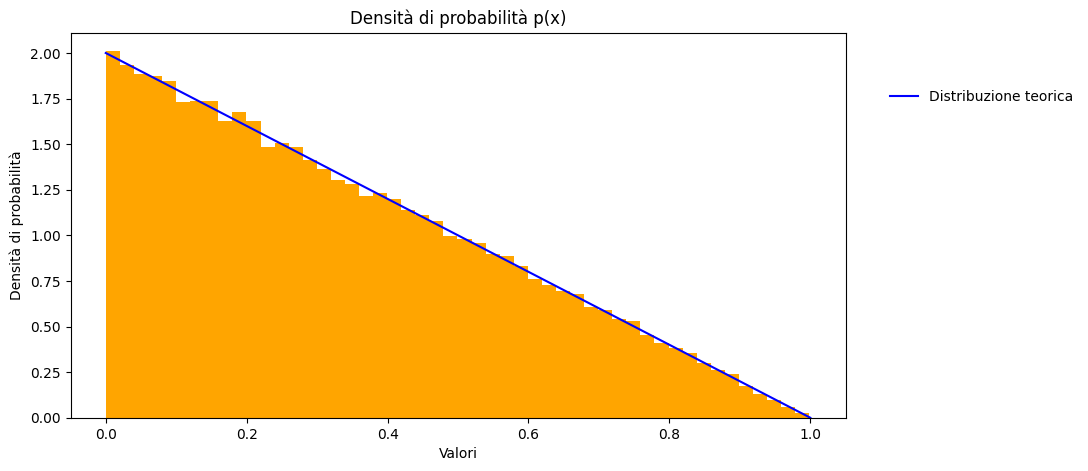

In [8]:
figura, grafico = plt.subplots(1, 1, figsize=(10, 5))

#Valori generati con il metodo accept/reject
grafico.hist(test[ : , 2], bins=50, density=True, facecolor='orange')

#Distribuzione di probabilità teorica
x = np.array([ i * 1/50 for i in range(0, 51)])
f = np.array([ 2 * (1 - i) for i in x ])

grafico.plot(x, f, color = 'blue', label = "Distribuzione teorica")

# Aggiungiamo etichette ai nostri assi
plt.xlabel('Valori')
plt.ylabel('Densità di probabilità')

#Legenda e titolo del grafico
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.title(f"Densità di probabilità p(x)")


# Mostriamo il grafico
plt.show()

Una volta appurato che la distribuzione generata è quella ricercata posso procedere con la stima dell' integrale: lavoro con $N\,=\,100$ blocchi di lunghezza $L\,=\,100000$ ciascuno.

Stima finale: 0.999993 +/- 4.177e-05


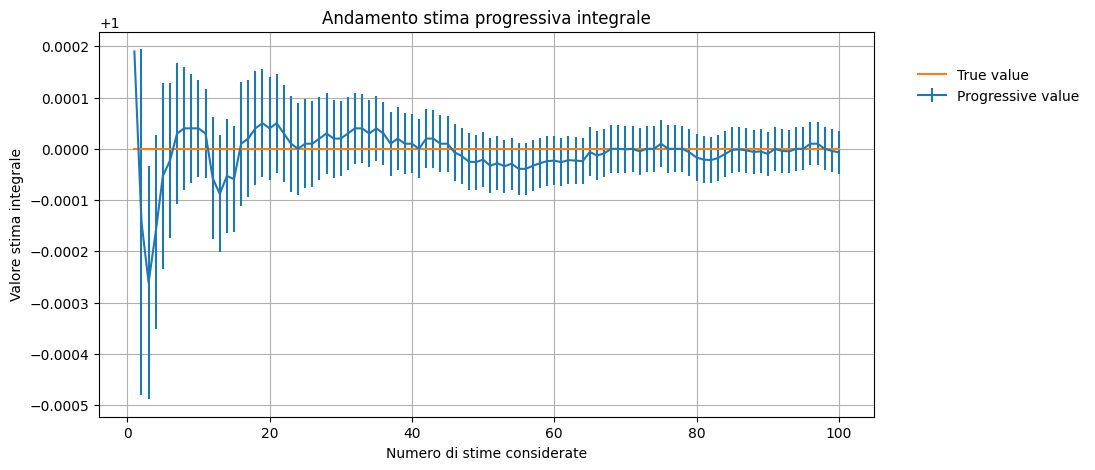

In [9]:
# Importo i valori generati con codice in C++
med_prog, devmed_prog = np.loadtxt("ESERCIZIO_1/StimaDistr2Cum.dat", unpack=True)


figura, plot = plt.subplots(1, 1, figsize=(10, 5))

#Asse x del grafico
x = np.arange(1, N+1, 1)

plt.errorbar(x,med_prog,yerr=devmed_prog, label = "Progressive value")
plt.plot(x, np.array([1 for i in range(0,len(x))]), label = "True value")
plt.xlabel('Numero di stime considerate')
plt.ylabel('Valore stima integrale')

plt.legend(loc=(1.05, 0.8), frameon=False)
plt.title(f"Andamento stima progressiva integrale")

print('Stima finale: ' + str(np.round(med_prog[N-1], 8)) + ' +/- ' + str(round(devmed_prog[N-1], 8)))

plt.grid(True)
plt.show()

### Osservazioni

Tutte e quattro gli integrali Monte-Carlo sono stati calcolati con:

$$
\begin{cases}
    N\,=\,100 \\
    L\,=\,10000
\end{cases}
$$

Gli errori finali che si ottengono (ossia avendo considerato tutti e cento i blocchi), dato che il campione statistico è lo stesso per le varie stime, riflettono l'accuratezza dei metodi utilizzati: fra Uniform Sampling ed Importance Sampling abbiamo una leggera diminuzione, infatti gli errori finali sono:

$$
\begin{cases}

    \sigma_1 = 0.000147222 \\
    \sigma_2 = 0.000110236 \\
    \sigma_3 = 9.96443e-05 \\
    \sigma_4 = 4.1773e-05
    
\end{cases}
$$

dove i pedici sono riferiti all'ordine con cui sono state presentate le stime. Si ha un fattore moltiplicativo 3.5 che balla fra l'incertezza della stima ottenuta con Uniform Sampling e quella con Importance Sampling e campionamento per inversione della cumulativa.
<br><br><br>

## <center> <span style="color: blue;">Esercizio 2</span> </center>

L'obiettivo di questo esercizio è lo studio dei Random Walk: essi sono delle traiettorie in cui gli step che vengono effettuati sono casuali. Le tipologie di RW prese in considerazione sono due:

- RW a **step discreti**

- RW nel **continuo**

Nel primo dei due casi si considera un reticolo tridimensionale di passo $a\,=\,1$ sul quale ad ogni time-step discreto il walker può muoversi lungo una sola direzione o avanti o indietro di una quantità pari ad $a$. Nel continuo la situazione è più generalizzata in quanto ad ogni time step discreto il passo di lunghezza $a\,=\,1$ pari ad uno viene compiuta in una direzione casuale, che viene scelta campionando unifomemente l'angolo solido, ossia: $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$.

La simulazione di tali RW consente di produrre $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ come una funzione del passo $i\in [0,10^2]$ ed i relativi errori. L'andamento di tale osservabile deve poi essere confrontato con una funzione del tipo: $f(N)=k\sqrt{N}$.

### RW discreto

Riporto un tipico random walk tridimensionale a step discreti: come si può notare i vari passi avvengono lungo una delle tre direzioni definite dagli assi cartesiani.

<center> 

![Alt text](IMMAGINI/RW_disc.png) 

</center>

Andiamo ora a valutare l'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$. Per fare questo simuliamo diecimila random walk di lunghezza pari a $N\,=\,100$:

In [10]:
# Importo i valori generati con codice in C++
med_prog, devmed_prog = np.loadtxt("ESERCIZIO_2/RWDiscreto.dat", unpack=True)

#Asse x del grafico
N = 100
x = np.arange(2, N+1, 1)

def funz(x, k):
    return k * np.sqrt(x)

para, cov = curve_fit(funz, x, med_prog[1:100], sigma = devmed_prog[1:100])

print('Valore parametro k del fit: ' + str(np.round(para[0], 8)) + ' +/- ' + str(round(cov[0][0], 8)))

Valore parametro k del fit: 1.00223099 +/- 2e-08


Il parametro $k$ del fit è circa pari ad uno. Ci aspettiamo allora di osservare una elevata compatibilità fra il modello teorico ed i valori simulati:

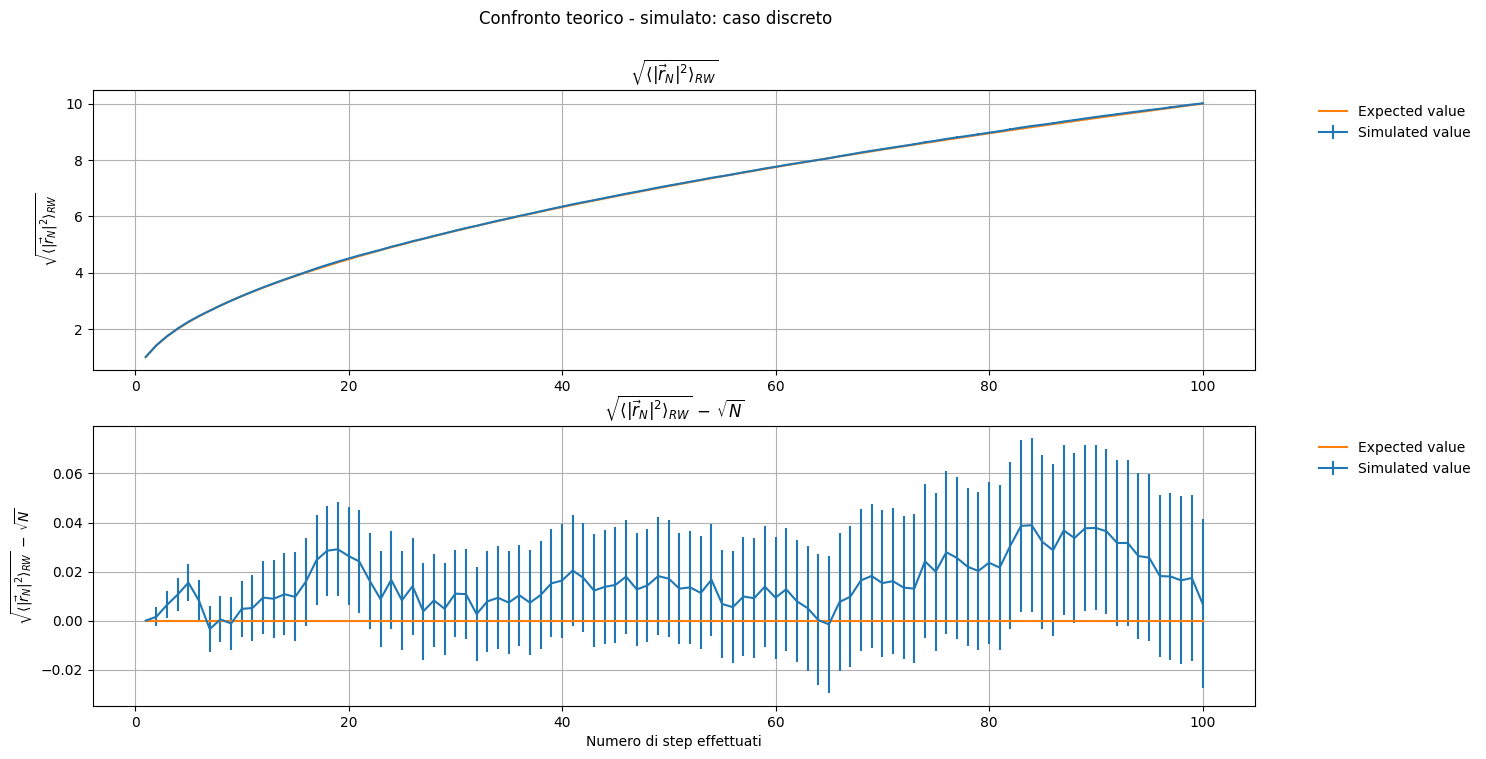

In [11]:
figura, axes = plt.subplots(2, 1, figsize=(15, 8))
x = np.arange(1, N+1, 1)

for i in range(0, 2):
    
    if i==0:
        axes[i].errorbar(x,med_prog,yerr=devmed_prog, label = "Simulated value")
        axes[i].plot(x, np.array([np.sqrt(i) for i in x]), label = "Expected value")
        axes[i].set_ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$")
        axes[i].set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
    
    else:
        axes[i].errorbar(x,np.array([med_prog[i] - np.sqrt(i+1) for i in range(0, N)]) ,yerr=devmed_prog, label = "Simulated value")
        axes[i].plot(x, np.array([0 for i in x]), label = "Expected value")
        axes[i].set_ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}\,-\,\sqrt{N}$")
        axes[i].set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}\,-\,\sqrt{N}$')
        axes[i].set_xlabel('Numero di step effettuati')

    axes[i].legend(loc=(1.05, 0.8), frameon=False)
    axes[i].grid(True)

figura.suptitle(r"Confronto teorico - simulato: caso discreto")

plt.show()

### RW continuo

Anche in questo caso riporto inizialmente un tipico esempio di random walk continuo. La lunghezza del RW plottato è pari a 100 step.

<center>

![Alt text](IMMAGINI/RW_cont.png)

</center>

Nuovamente valutiamo l'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$. Per fare questo simuliamo diecimila random walk di lunghezza pari a $n_{step}\,=\,100$:

In [12]:
# Importo i valori generati con codice in C++
med_prog, devmed_prog = np.loadtxt("ESERCIZIO_2/RWContinuo.dat", unpack=True)

#Asse x del grafico
x = np.arange(1, N+1, 1)

#Effettuo il fit
para, cov = curve_fit(funz, x, med_prog, sigma = devmed_prog)
print('Valore parametro k del fit: ' + str(np.round(para[0], 10)) + ' +/- ' + str(round(cov[0][0],10)))

Valore parametro k del fit: 1.0 +/- 0.0


Il parametro $k$ del fit è pari ad uno. Ci aspettiamo allora di osservare una elevata compatibilità fra il modello teorico ed i valori simulati:

Text(0.5, 0.98, 'Confronto teorico - simulato: caso continuo')

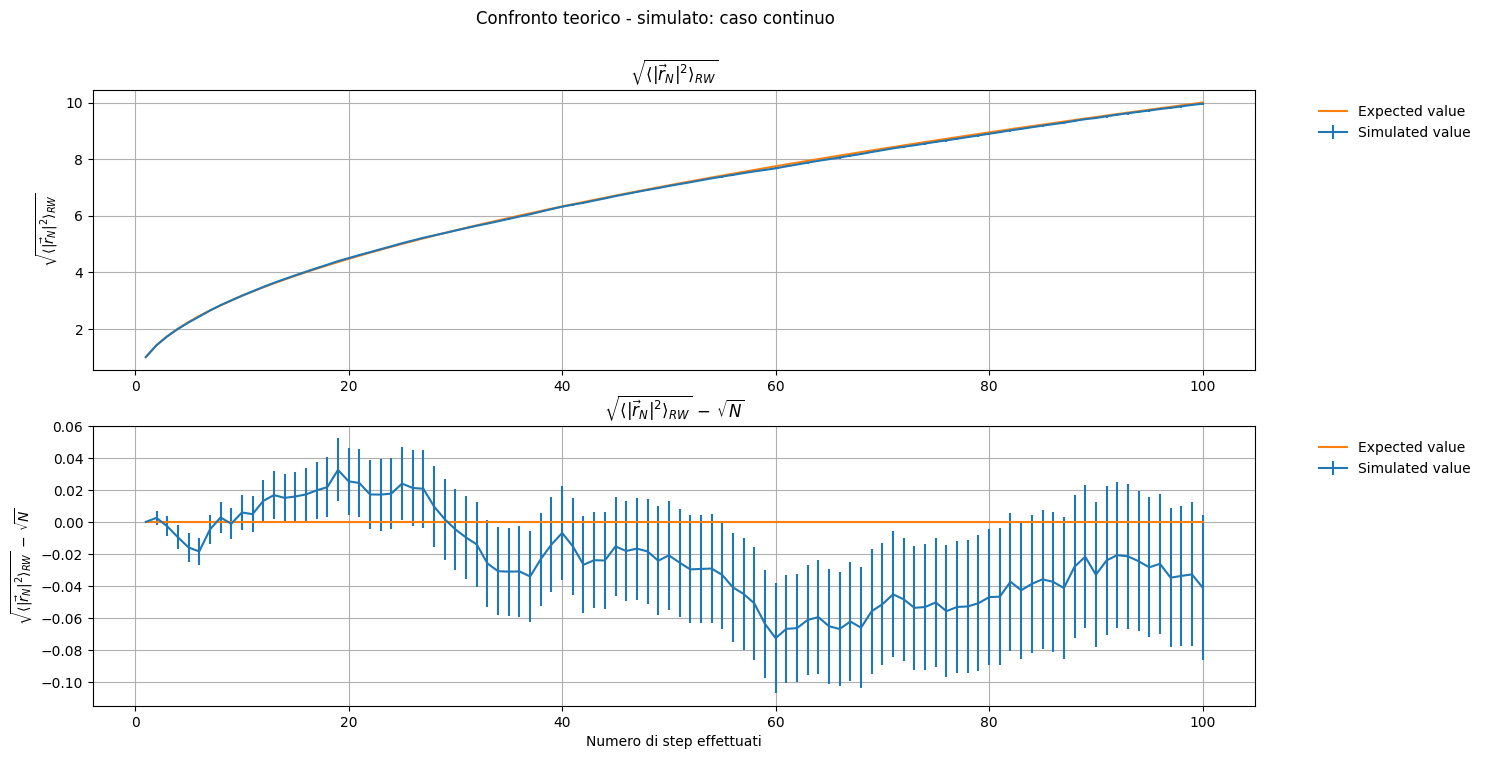

In [13]:
figura, axes = plt.subplots(2, 1, figsize=(15, 8))
x = np.arange(1, N+1, 1)

for i in range(0, 2):
    
    if i==0:
        axes[i].errorbar(x,med_prog,yerr=devmed_prog, label = "Simulated value")
        axes[i].plot(x, np.array([np.sqrt(i) for i in x]), label = "Expected value")
        axes[i].set_ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$")
        axes[i].set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
    
    else:
        axes[i].errorbar(x,np.array([med_prog[i] - np.sqrt(i+1) for i in range(0, N)]) ,yerr=devmed_prog, label = "Simulated value")
        axes[i].plot(x, np.array([0 for i in x]), label = "Expected value")
        axes[i].set_ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}\,-\,\sqrt{N}$")
        axes[i].set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}\,-\,\sqrt{N}$')
        axes[i].set_xlabel('Numero di step effettuati')

    axes[i].legend(loc=(1.05, 0.8), frameon=False)
    axes[i].grid(True)

figura.suptitle(r"Confronto teorico - simulato: caso continuo")

### Osservazioni

Notiamo che i valori simulati, sia nel caso del RW discreto, che in quello continuo, sono fortemente in accordo con l'andamento teoricamente noto dato da:
$$f(n)\,=\,\sqrt{n}$$
dove $n$ è il numero di step effettuati. Questo evidente accordo è anche sottolineato dai vari fit effettuati, in cui il valore di $k$ è confrontabile con l'unità.